<a href="https://colab.research.google.com/github/cmontg26/Data110/blob/main/Candace_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Load all sheets
excel_path = "/content/Future of Jobs and AI.xlsx"

jobs_df          = pd.read_excel(excel_path, sheet_name="Future of Jobs and AI")
series_df        = pd.read_excel(excel_path, sheet_name="Top Skills by Series")
edu_df           = pd.read_excel(excel_path, sheet_name="Top Skill by Education")
fastest_df       = pd.read_excel(excel_path, sheet_name="Top Fastest Growing")
percent_skill_df = pd.read_excel(excel_path, sheet_name="Percentage by Position Skill")

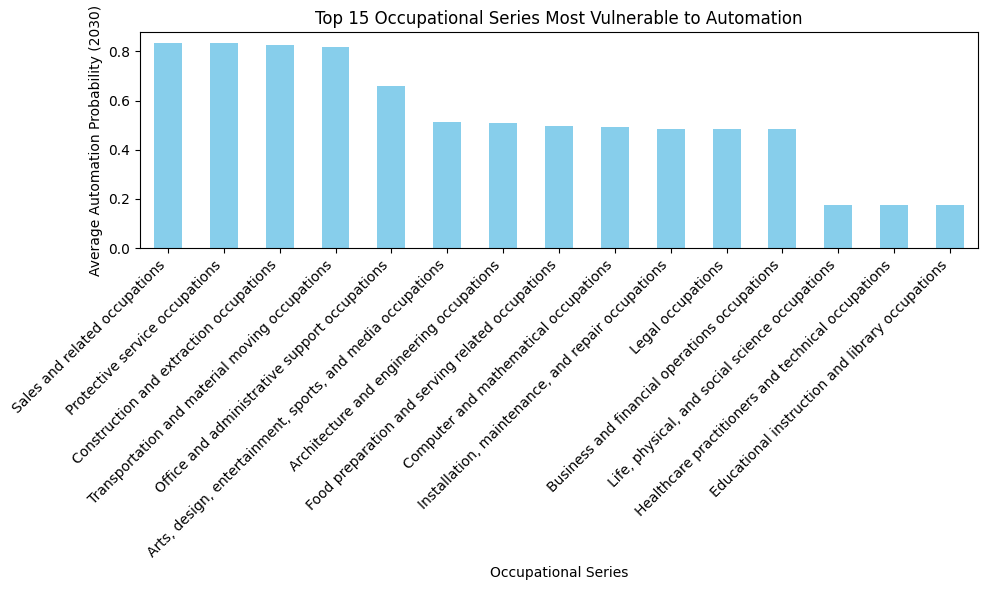

In [ ]:
import matplotlib.pyplot as plt

# Aggregate automation probability by occupational series (corrected column name)
series_risk = (
    jobs_df.groupby("Occupational_Series")["Automation_Probability_2030"]
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

plt.figure(figsize=(10,6))
series_risk.plot(kind="bar", color="skyblue")
plt.title("Top 15 Occupational Series Most Vulnerable to Automation")
plt.ylabel("Average Automation Probability (2030)")
plt.xlabel("Occupational Series")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


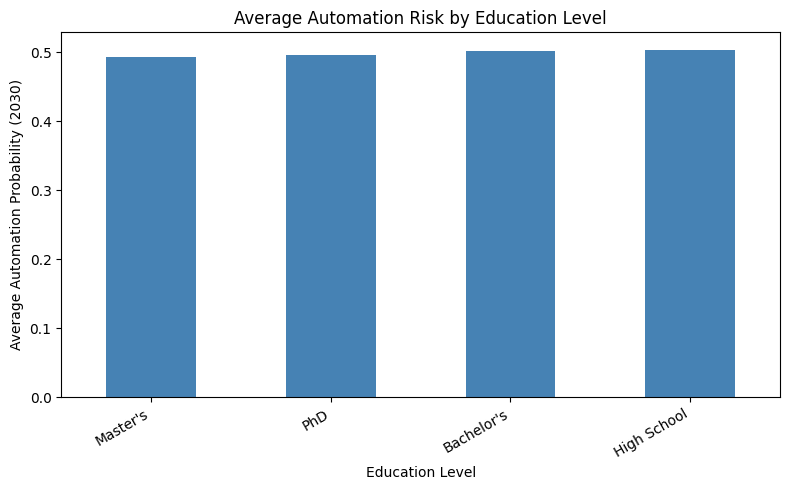

Average automation risk by education level:
Education_Level
Master's       0.493225
PhD            0.496384
Bachelor's     0.501467
High School    0.503867
Name: Automation_Probability_2030, dtype: float64


In [ ]:
# Compute automation probability per education level
edu_risk = (
    jobs_df.groupby("Education_Level")["Automation_Probability_2030"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(8,5))
edu_risk.plot(kind="bar", color="steelblue")
plt.title("Average Automation Risk by Education Level")
plt.ylabel("Average Automation Probability (2030)")
plt.xlabel("Education Level")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

print("Average automation risk by education level:")
print(edu_risk)


/tmp/ipython-input-3603083379.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


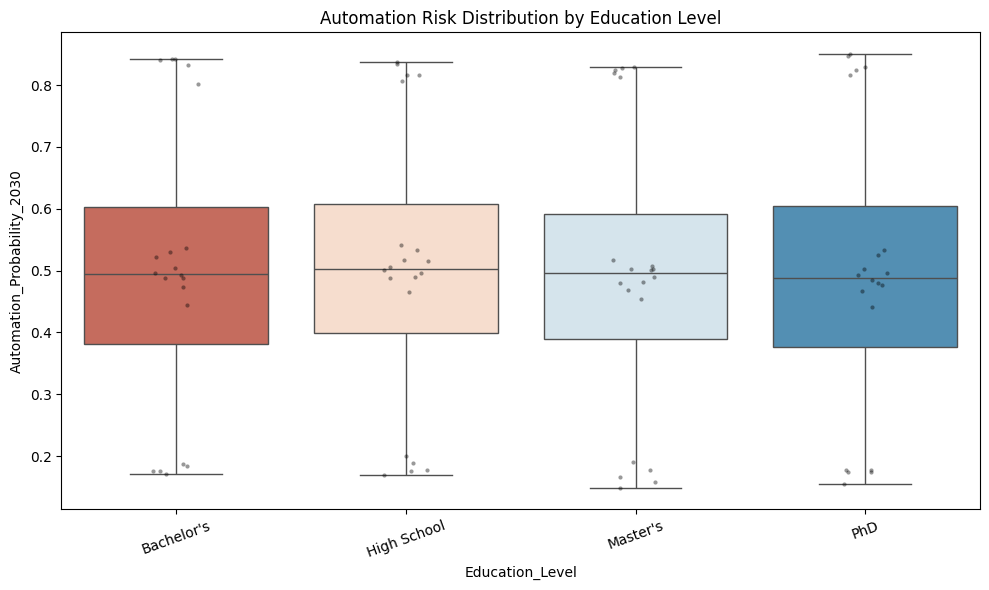

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=jobs_df,
    x="Education_Level",
    y="Automation_Probability_2030",
    palette="RdBu"
)
sns.stripplot(
    data=jobs_df,
    x="Education_Level",
    y="Automation_Probability_2030",
    color="black",
    size=3,
    alpha=0.4
)

plt.title("Automation Risk Distribution by Education Level")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


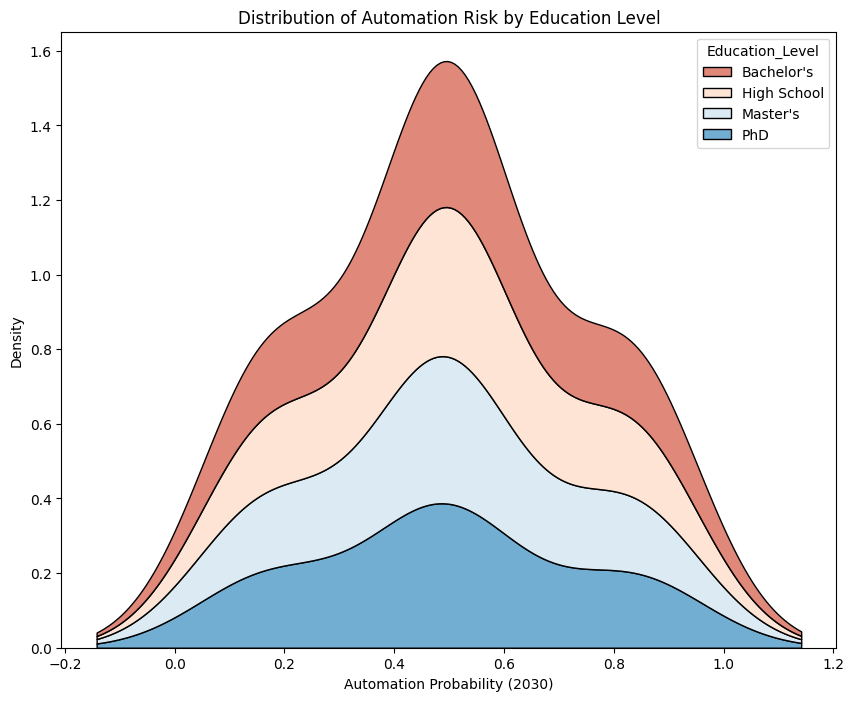

In [ ]:
plt.figure(figsize=(10,8))

sns.kdeplot(
    data=jobs_df,
    x="Automation_Probability_2030",
    hue="Education_Level",
    multiple="stack",
    fill=True,
    palette="RdBu"
)

plt.title("Distribution of Automation Risk by Education Level")
plt.xlabel("Automation Probability (2030)")
plt.show()


In [ ]:
fig = px.box(
    jobs_df,
    x="Occupational_Series",
    y="Automation_Probability_2030",
    color="Education_Level",
    title="Automation Risk Across Occupational Series by Education Level")

fig.update_layout(
    width=1200,
    height=700,
    xaxis_tickangle=45,
    legend_title="Education Level",
    title_x=0.5)

fig.show()

In [ ]:
# Aggregate numeric columns by occupational series
agg_cols = ["AI_Exposure_Index", "Automation_Probability_2030", "Tech_Growth_Factor"]
series_agg = jobs_df.groupby("Occupational_Series")[agg_cols].mean().reset_index()

fig = px.scatter(
    series_agg,
    x="AI_Exposure_Index",
    y="Automation_Probability_2030",
    hover_name="Occupational_Series",
    size="Tech_Growth_Factor",
    color="Automation_Probability_2030",
    title="AI Exposure vs Automation Risk (Aggregated by Occupational Series)",
    labels={
        "AI_Exposure_Index": "AI Exposure Index",
        "Automation_Probability_2030": "Automation Risk (2030)"
    }
)
fig.show()


In [ ]:
!pip -q install openpyxl plotly statsmodels wordcloud joypy

import pandas as pd
import numpy as np

import plotly.express as px
import plotly.io as pio

import matplotlib.pyplot as plt
from wordcloud import WordCloud

import joypy  # ridge/joyplot

excel_path = "/content/FutureJobsandAutomation.xlsx"

USE_TRANSPARENT = True
ACCENT = "#7FDBFF"  # one consistent accent color for charts
paper_bg = "rgba(0,0,0,0)" if USE_TRANSPARENT else "white"
plot_bg  = "rgba(0,0,0,0)" if USE_TRANSPARENT else "white"
font_col = "#EAF6FF" if USE_TRANSPARENT else "#111111"
grid_col = "rgba(255,255,255,0.18)" if USE_TRANSPARENT else "rgba(0,0,0,0.12)"

pio.templates.default = "plotly_white"

def style(fig, title):
    fig.update_layout(
        title=title,
        paper_bgcolor=paper_bg,
        plot_bgcolor=plot_bg,
        font=dict(color=font_col),
        margin=dict(l=50, r=30, t=60, b=50)
    )
    fig.update_xaxes(gridcolor=grid_col, zeroline=False)
    fig.update_yaxes(gridcolor="rgba(0,0,0,0)", zeroline=False)
    return fig

future = pd.read_excel(excel_path, sheet_name="Future Job Automation")
expo   = pd.read_excel(excel_path, sheet_name="Exposure Demographics")

expo = expo[["Demographic_Type", "Demographics", "Exposure_Percentage"]].copy()
expo["Exposure_Percentage"] = pd.to_numeric(expo["Exposure_Percentage"], errors="coerce")


In [ ]:
age = expo[expo["Demographic_Type"].str.lower() == "age"].dropna().copy()

# Sort age groups
age["Demographics"] = pd.Categorical(age["Demographics"], categories=age["Demographics"], ordered=True)
age = age.sort_values("Demographics")

fig = px.bar(
    age,
    x="Demographics",
    y="Exposure_Percentage",
    color_discrete_sequence=[ACCENT]
)

# Narrow columns + clean look
fig.update_traces(
    width=0.25,
    hovertemplate="%{x}<br>Exposure: %{y:.1%}<extra></extra>",
     marker=dict(
        opacity=0.85,                 # instead of alpha
        line=dict(width=1.5, color="rgba(0,0,0,0.35)")  # for the edge/border
    ),
    texttemplate="%{y:.0%}" if "Exposure_Percentage" in fig.to_dict()["data"][0].get("hovertemplate","") else None,
    textposition="outside"
)

fig.update_layout(
    yaxis_tickformat=".0%",
    xaxis_title="Age Group",
    yaxis_title="AI Exposure"
)

style(fig, "AI Exposure by Age").show()

In [ ]:
race = expo[expo["Demographic_Type"].str.lower()=="race"].dropna().copy()
race = race.sort_values("Exposure_Percentage")

fig = px.scatter(
    race,
    x="Exposure_Percentage",
    y="Demographics",
    color_discrete_sequence=[ACCENT]
)
# add “sticks”
for i, row in race.iterrows():
    fig.add_shape(type="line",
                  x0=0, x1=row["Exposure_Percentage"],
                  y0=row["Demographics"], y1=row["Demographics"],
                  line=dict(color=ACCENT, width=2))
fig.update_xaxes(tickformat=".0%")

fig.add_annotation(
    x="Exposure_Percentage", y="Demographics",
    text="Highest exposure",
    showarrow=True,
    arrowhead=2,
    ax=40, ay=-30,
    font=dict(size=12),
    bgcolor="rgba(255,255,255,0.12)",
    bordercolor="rgba(255,255,255,0.35)",
    borderwidth=1
)

style(fig, "Racial Demographics and Automation Vulnerability").show()


In [ ]:
future["Employment_Change_Percent"] = pd.to_numeric(future["Employment_Change_Percent"], errors="coerce")
d = future[["Job_Title","Employment_Change_Percent"]].dropna()

bottom = d.nsmallest(20, "Employment_Change_Percent")
fig = px.treemap(
    bottom,
    path=["Job_Title"],
    values=bottom["Employment_Change_Percent"].abs(),
    color="Employment_Change_Percent",
    color_continuous_scale="RdBu",
)
style(fig, "Largest Declines in Employment Change").show()


In [ ]:
top = d.nlargest(20, "Employment_Change_Percent").sort_values("Employment_Change_Percent")

fig = px.scatter(
    top,
    x="Employment_Change_Percent",
    y="Job_Title",
    color_discrete_sequence=[ACCENT]
)
style(fig, "Largest Increases in Employment Change").show()


In [ ]:
future["Annual_Job_Openings_average"] = pd.to_numeric(future["Annual_Job_Openings_average"], errors="coerce")
o = future[["Job_Title","Annual_Job_Openings_average"]].dropna()

top20 = o.nlargest(20, "Annual_Job_Openings_average").sort_values("Annual_Job_Openings_average")
bot20 = o.nsmallest(20, "Annual_Job_Openings_average").sort_values("Annual_Job_Openings_average")

fig = px.bar(top20, x="Annual_Job_Openings_average", y="Job_Title", orientation="h",
             color_discrete_sequence=[ACCENT])
style(fig, "Top 20 Job Titles by Avg Annual Openings (000s)").show()

fig = px.bar(bot20, x="Annual_Job_Openings_average", y="Job_Title", orientation="h",
             color_discrete_sequence=[ACCENT])

style(fig, "Bottom 20 Job Titles by Avg Annual Openings (000s)").show()


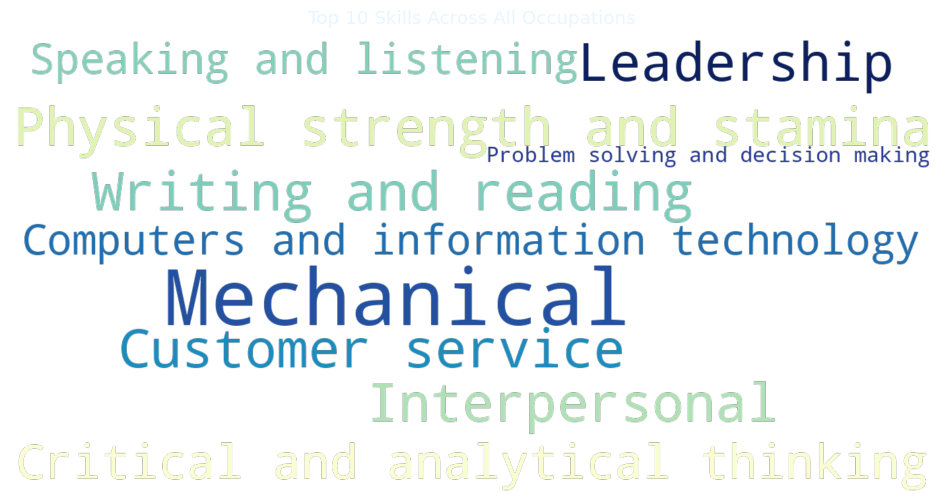

In [ ]:
skill_cols = [
    "Adaptability","Computers and information technology","Creativity and innovation",
    "Critical and analytical thinking","Customer service","Detail oriented","Fine motor",
    "Interpersonal","Leadership","Mathematics","Mechanical","Physical strength and stamina",
    "Problem solving and decision making","Project management","Science",
    "Speaking and listening","Writing and reading"
]

for c in skill_cols:
    if c in future.columns:
        future[c] = pd.to_numeric(future[c], errors="coerce")

skill_means = future[skill_cols].mean().sort_values(ascending=False).head(10)
freq = skill_means.to_dict()

wc = WordCloud(
    width=1400,
    height=700,
    background_color=None if USE_TRANSPARENT else "white",
    mode="RGBA" if USE_TRANSPARENT else "RGB",
    colormap="YlGnBu"   # <-- light gradient palette
).generate_from_frequencies(freq)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Top 10 Skills Across All Occupations", color=font_col)
plt.gca().set_facecolor("none" if USE_TRANSPARENT else "white")
plt.gcf().set_facecolor("none" if USE_TRANSPARENT else "white")
plt.show()


In [ ]:
xls = pd.ExcelFile(excel_path)
print(xls.sheet_names)

edu_sheets = ['No Formal Education', 'High School or equivalent', "Associate's or Trade School", "Bachelor's", 'Graduate']
openings_col = "Occupational openings, projected 2023–33 annual average"
occ_col_guess = "Occupation"

['Future Job Automation', 'Exposure Demographics', 'No Formal Education', 'High School or equivalent', "Associate's or Trade School", "Bachelor's", 'Graduate']


<Figure size 1000x600 with 0 Axes>

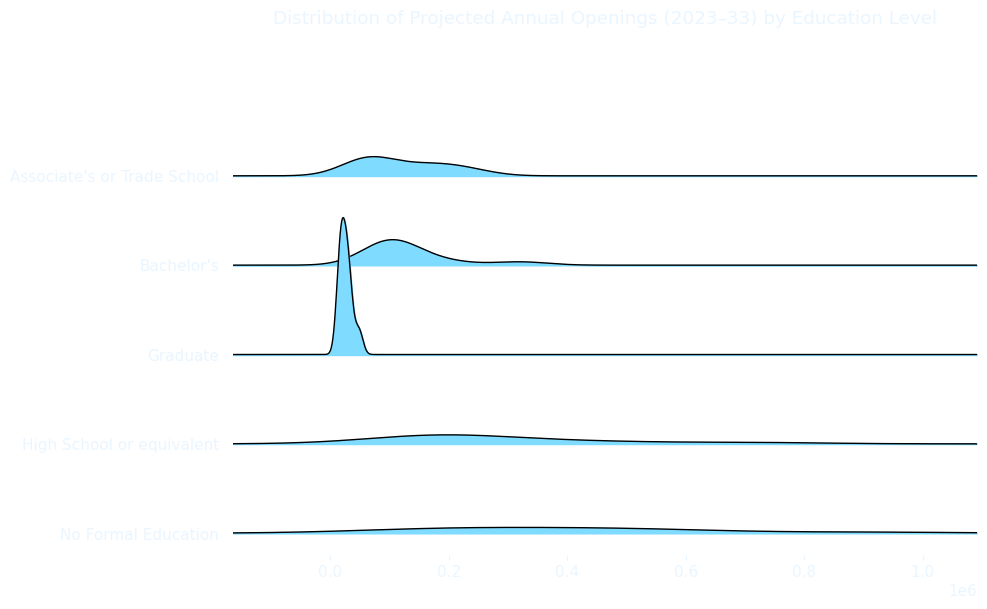

In [ ]:
frames = []
for s in edu_sheets:
    df = pd.read_excel(excel_path, sheet_name=s).copy()
    occ_col = occ_col_guess if occ_col_guess in df.columns else df.columns[0]
    df[openings_col] = pd.to_numeric(df[openings_col], errors="coerce")
    df = df.dropna(subset=[openings_col])
    df["Education_Level"] = s
    frames.append(df[[occ_col, openings_col, "Education_Level"]].rename(columns={occ_col:"Occupation"}))

ed = pd.concat(frames, ignore_index=True)

# Joyplot / ridge plot of openings distribution by education level
plt.figure(figsize=(10,6))
joypy.joyplot(
    ed,
    by="Education_Level",
    column=openings_col,
    figsize=(10,6),
    color=ACCENT,      # single color scheme
    linewidth=1
)
plt.title("Distribution of Projected Annual Openings (2023–33) by Education Level", color=font_col)
plt.gca().set_facecolor("none" if USE_TRANSPARENT else "white")
plt.gcf().set_facecolor("none" if USE_TRANSPARENT else "white")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load prior state-level CSV
df = pd.read_csv("ipums_2023_state_maps.csv")
df.head()

# Office/admin: distribution (% of US office/admin workers in each state)
df["office_dist_share"] = pd.to_numeric(df["office_admin_n"], errors="coerce") / total_office

# Add state abbrev for Plotly USA-states mapping
df["STATEFIP"] = df["STATEFIP"].astype(str).str.zfill(2)
fips_to_abbrev = {
    "01":"AL","02":"AK","04":"AZ","05":"AR","06":"CA","08":"CO","09":"CT","10":"DE","11":"DC",
    "12":"FL","13":"GA","15":"HI","16":"ID","17":"IL","18":"IN","19":"IA","20":"KS","21":"KY",
    "22":"LA","23":"ME","24":"MD","25":"MA","26":"MI","27":"MN","28":"MS","29":"MO","30":"MT",
    "31":"NE","32":"NV","33":"NH","34":"NJ","35":"NM","36":"NY","37":"NC","38":"ND","39":"OH",
    "40":"OK","41":"OR","42":"PA","44":"RI","45":"SC","46":"SD","47":"TN","48":"TX","49":"UT",
    "50":"VT","51":"VA","53":"WA","54":"WV","55":"WI","56":"WY"
}
df["state_abbrev"] = df["STATEFIP"].map(fips_to_abbrev)

# Gradient scale versus the box legend for map (blue-green gradient)
def make_map(value_col, title, cbar_title, annotation_text, fmt=".0%"):
    fig = px.choropleth(
        df,
        locations="state_abbrev",
        locationmode="USA-states",
        color=value_col,
        scope="usa",
        color_continuous_scale="PuBuGn",
        labels={value_col: cbar_title},
        title=title,
        hover_name="state_name",
        hover_data={value_col:":.2%","STATEFIP":True},
    )
    fig.update_layout(
        coloraxis_colorbar_tickformat=fmt,
        margin=dict(l=0, r=0, t=60, b=0),
        title=dict(x=0.02, xanchor="left"),
    )
    fig.add_annotation(
        x=0.01, y=0.02,
        xref="paper", yref="paper",
        text=annotation_text,
        showarrow=False,
        align="left",
        font=dict(size=12),
        bgcolor="rgba(255,255,255,0.75)",
        bordercolor="rgba(0,0,0,0.15)",
        borderwidth=1,
        borderpad=6,
    )
    return fig


fig_officeA = make_map(
    "office_dist_share",
    "Office & Administrative Workers per State (2023)",
    "Share of U.S. office/admin workers",
    "What percentage of the nation’s office/admin workforce is in each state?\nThis highlights which states are more vulnerable to automation."
)
fig_officeA.show()